In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **DATA CHECKS**


In [3]:
df=pd.read_csv('StudentsPerformance.csv')

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [9]:
numeric_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']

print("We have {} numeric features: {}".format(len(numeric_features),numeric_features))
print("We have {} categorical features: {}".format(len(categorical_features),categorical_features))

We have 3 numeric features: ['math score', 'reading score', 'writing score']
We have 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [10]:
print("Categories of 'Gender variable: ",end='')
print(df['gender'].unique())
print("Categories of 'race' variable: ",end='')
print(df['race/ethnicity'].unique())
print("Categories of 'parental level of education' variable: ",end='')
print(df['parental level of education'].unique())
print("Categories of 'lunch' variable: ",end='')
print(df['lunch'].unique())
print("Categories of 'test preparation course' variable: ",end='')
print(df['test preparation course'].unique())

Categories of 'Gender variable: ['female' 'male']
Categories of 'race' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories of 'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories of 'lunch' variable: ['standard' 'free/reduced']
Categories of 'test preparation course' variable: ['none' 'completed']


In [11]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [12]:
df['total score']=df['math score']+df['reading score']+df['writing score']
df['average']=df['total score']/3

In [13]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [14]:
math_full=(df['math score'] == 100).sum()
print(f'Number of students who scored full in maths: {math_full}')

reading_full=(df['reading score'] == 100).sum()
print(f'Number of students who scored full in reading: {reading_full}')

writing_full=(df['writing score'] == 100).sum()
print(f'Number of students who scored full in writing: {writing_full}')


Number of students who scored full in maths: 7
Number of students who scored full in reading: 17
Number of students who scored full in writing: 14


In [15]:
reading_less_20 = (df['reading score'] <= 20).sum()
writing_less_20 = (df['writing score'] <= 20).sum()
math_less_20 = (df['math score'] <= 20).sum()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


# **DATA** **VISUALISATION**

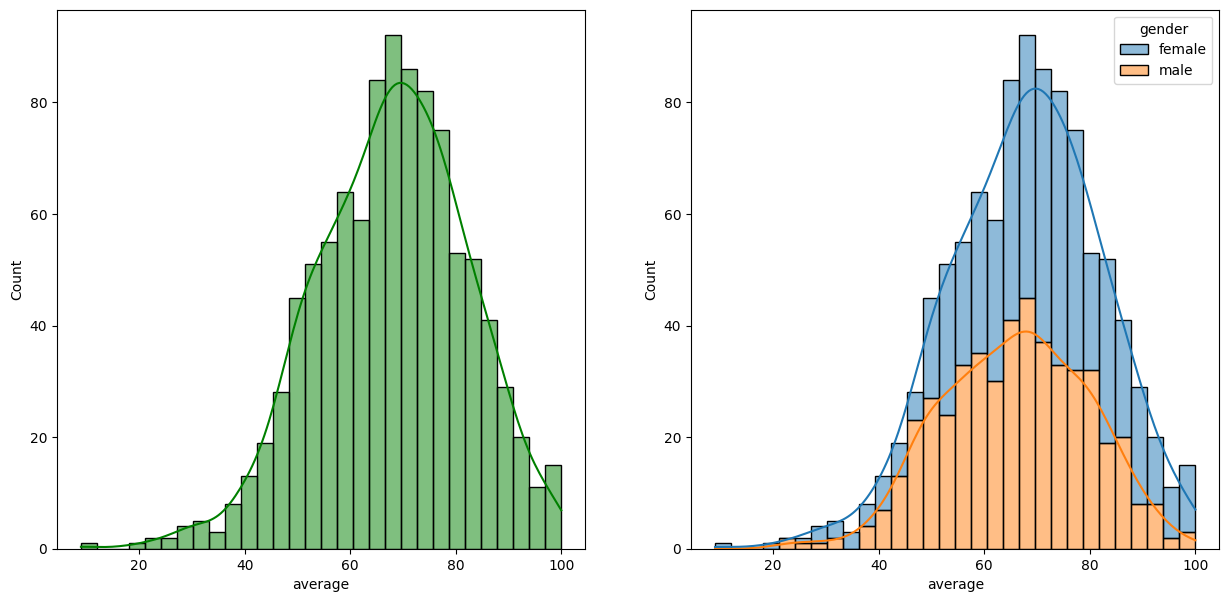

In [16]:
plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average', bins=30,kde=True,color='green')
plt.subplot(122)
sns.histplot(data=df,x='average',bins=30,hue='gender',kde=True,multiple='stack')
plt.show()

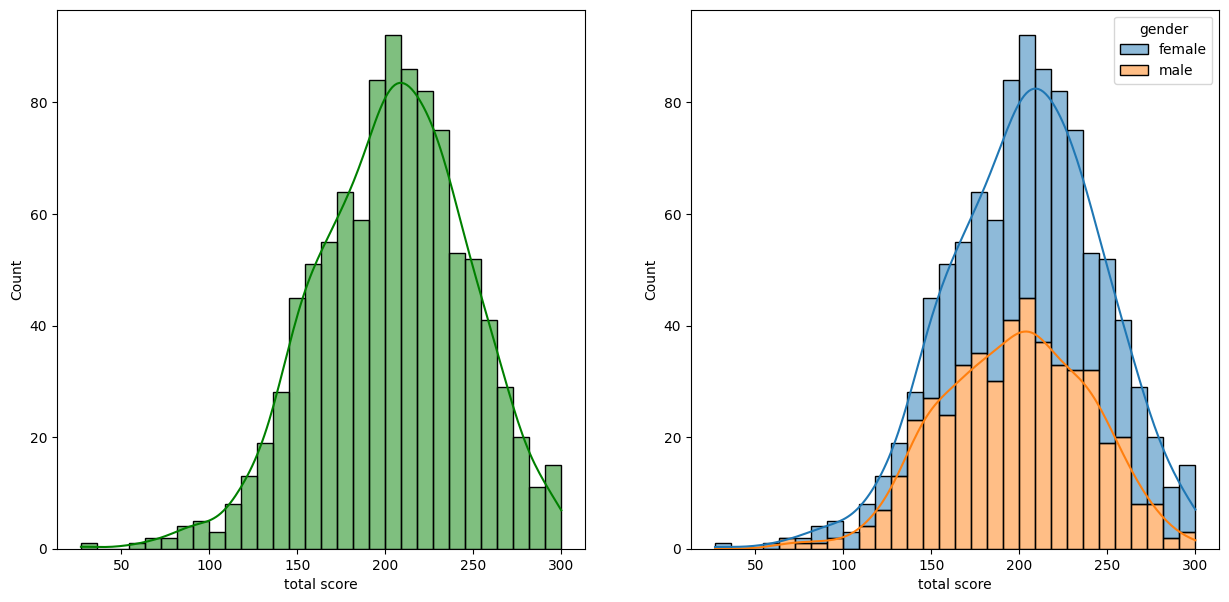

In [17]:
plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total score', bins=30,kde=True,color='green')
plt.subplot(122)
sns.histplot(data=df,x='total score',bins=30,hue='gender',kde=True,multiple='stack')
plt.show()

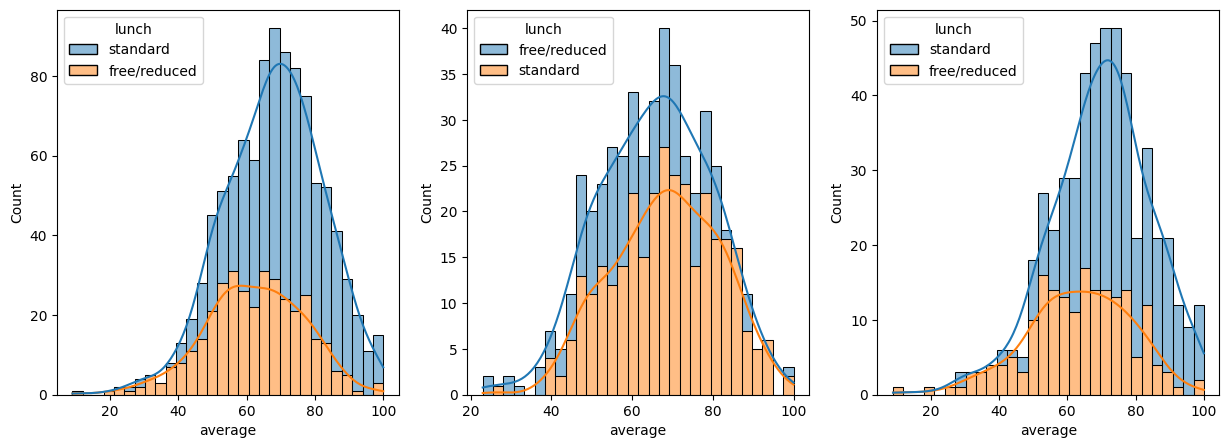

In [18]:
plt.subplots(1,3,figsize=(15,5))
plt.subplot(131)
sns.histplot(data=df,x='average', bins=30,kde=True,hue='lunch',multiple='stack')
plt.subplot(132)
sns.histplot(data=df[df.gender=='male'],x='average',bins=30,hue='lunch',kde=True,multiple='stack')
plt.subplot(133)
sns.histplot(data=df[df.gender=='female'],x='average',bins=30,hue='lunch',kde=True,multiple='stack')
plt.show()

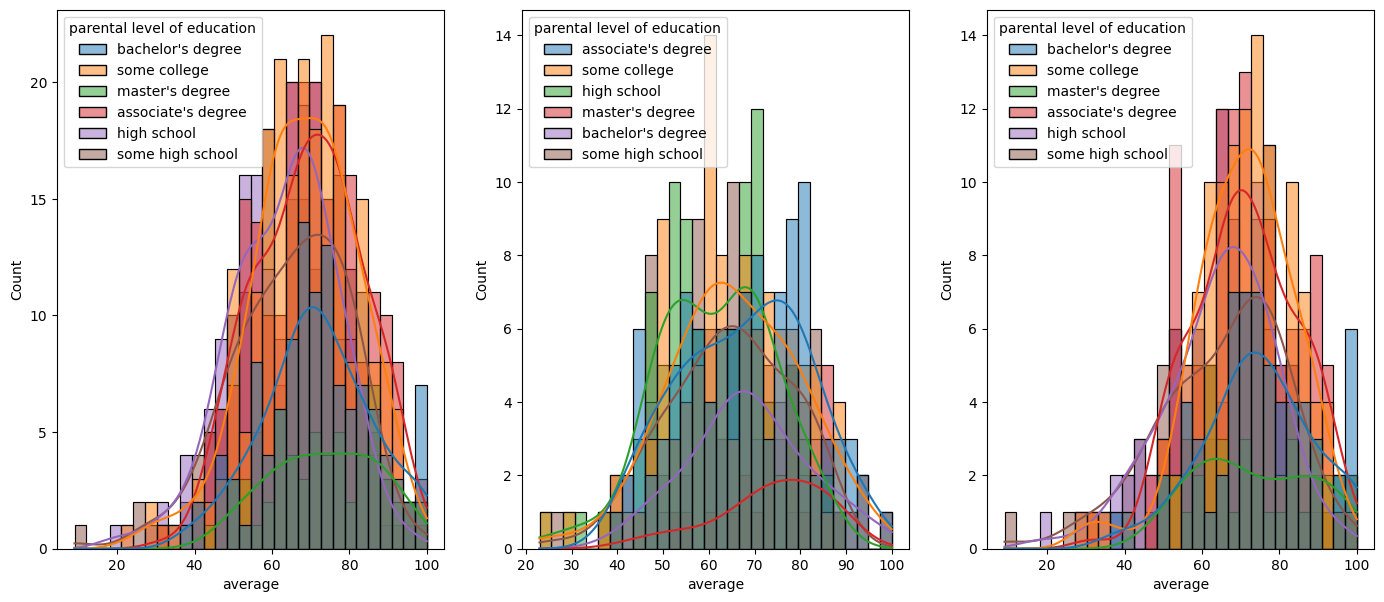

In [19]:
plt.subplots(1,3,figsize=(17,7))
plt.subplot(131)
sns.histplot(data=df,x='average', bins=30,kde=True,hue='parental level of education',)
plt.subplot(132)
sns.histplot(data=df[df.gender=='male'],x='average',bins=30,hue='parental level of education',kde=True,)
plt.subplot(133)
sns.histplot(data=df[df.gender=='female'],x='average',bins=30,hue='parental level of education',kde=True,)
plt.show()

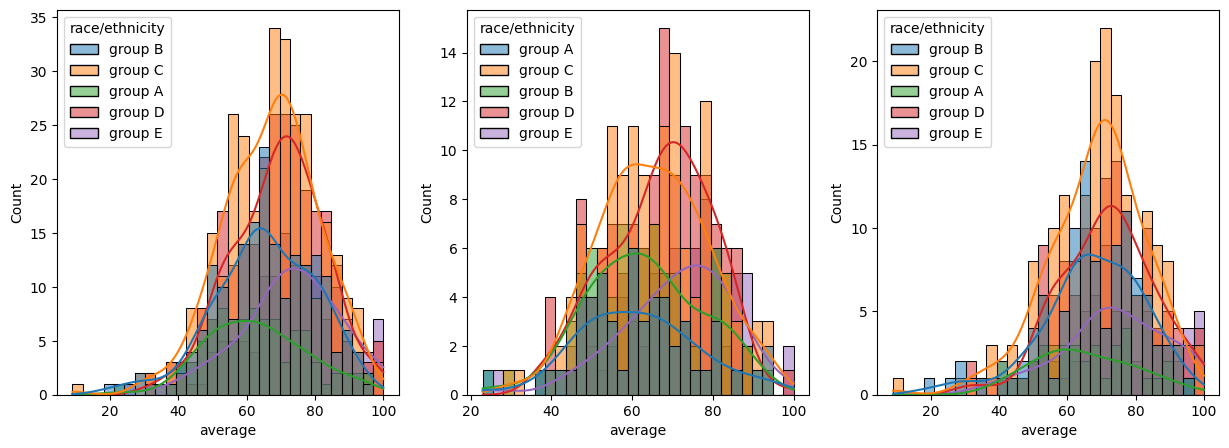

In [20]:
plt.subplots(1,3,figsize=(15,5))
plt.subplot(131)
sns.histplot(data=df,x='average', bins=30,kde=True,hue='race/ethnicity',)
plt.subplot(132)
sns.histplot(data=df[df.gender=='male'],x='average',bins=30,hue='race/ethnicity',kde=True,)
plt.subplot(133)
sns.histplot(data=df[df.gender=='female'],x='average',bins=30,hue='race/ethnicity',kde=True,)
plt.show()

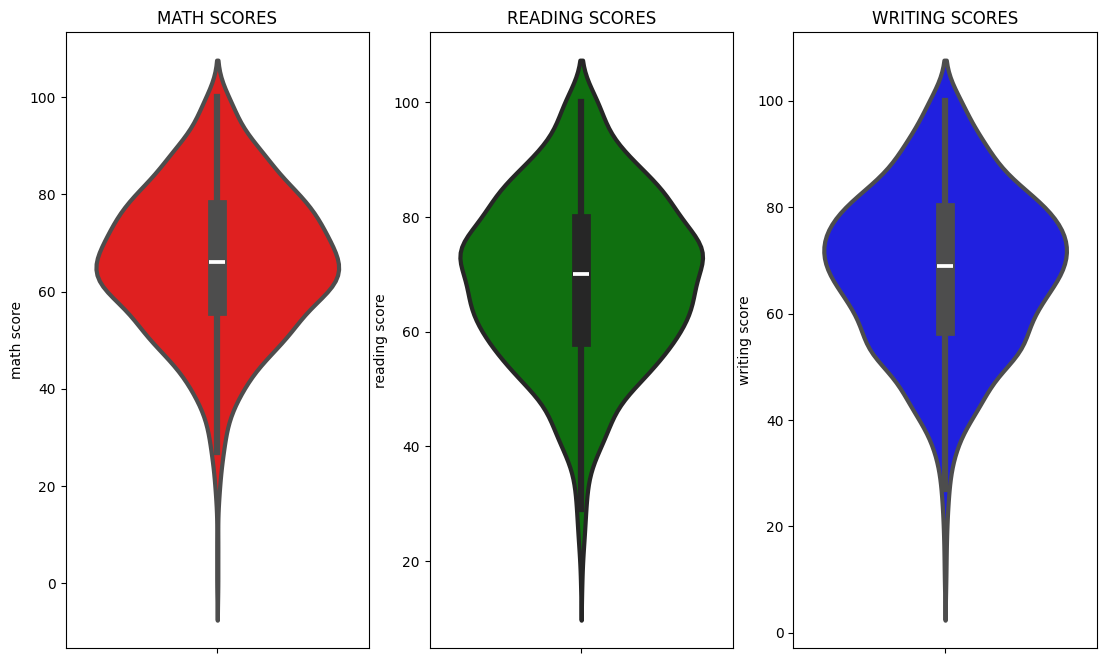

In [21]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

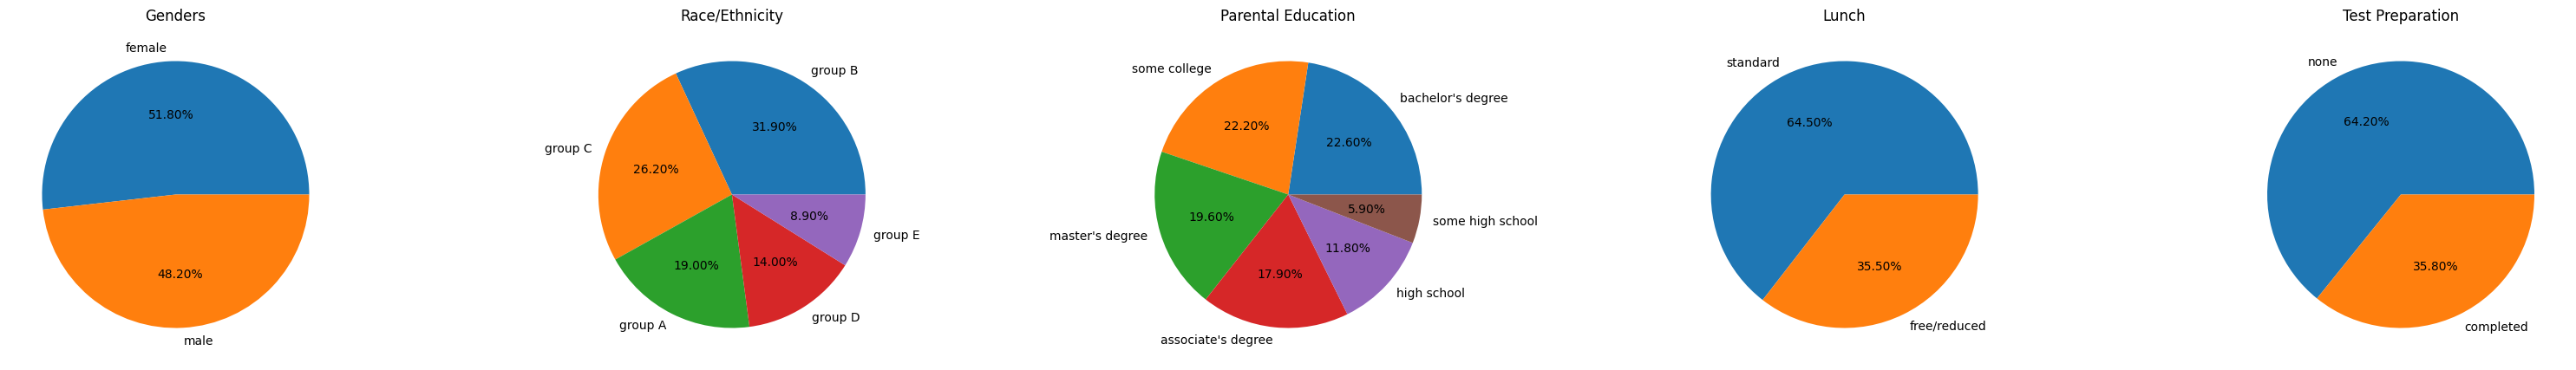

In [22]:
plt.figure(figsize=(40,5))
plt.subplot(151)
plt.pie(df['gender'].value_counts(),labels=df['gender'].unique(),autopct='%.2f%%')
plt.title('Genders')

plt.subplot(152)
plt.pie(df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].unique(),autopct='%.2f%%')
plt.title('Race/Ethnicity')

plt.subplot(153)
plt.pie(df['parental level of education'].value_counts(),labels=df['parental level of education'].unique(),autopct='%.2f%%')
plt.title('Parental Education')

plt.subplot(154)
plt.pie(df['lunch'].value_counts(),labels=df['lunch'].unique(),autopct='%.2f%%')
plt.title('Lunch')

plt.subplot(155)
plt.pie(df['test preparation course'].value_counts(),labels=df['test preparation course'].unique(),autopct='%.2f%%')
plt.title('Test Preparation')

plt.show()

Feature wise visualisation

Univariate analysis

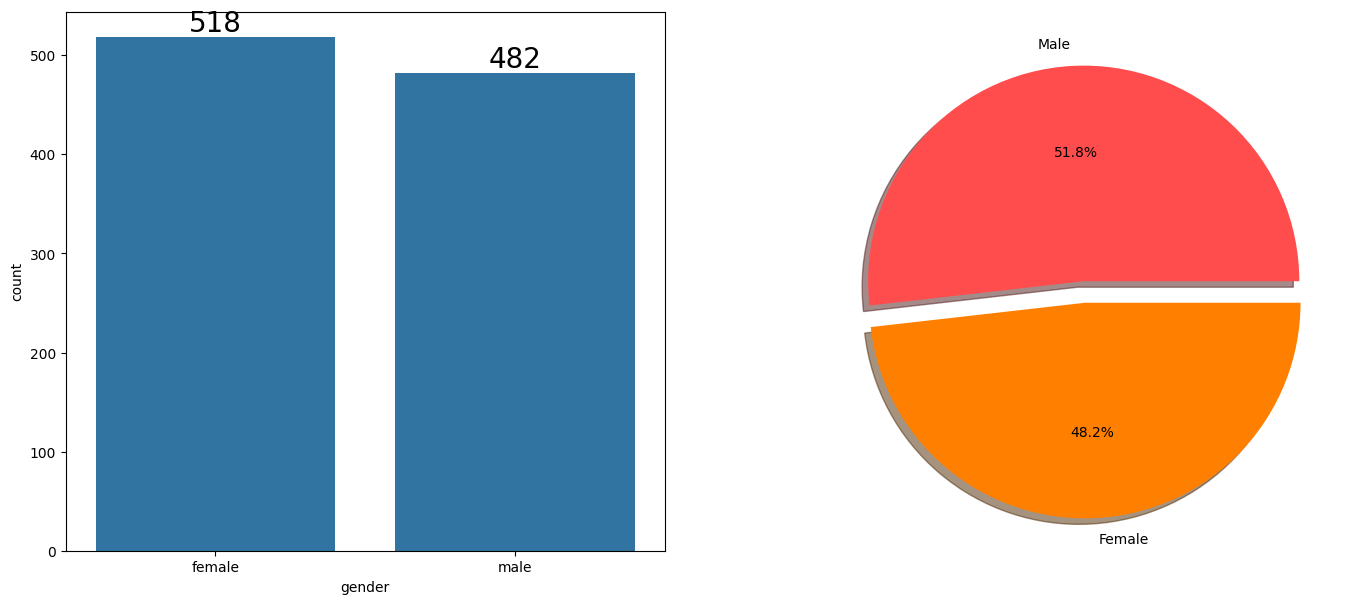

In [23]:
### Gender
f,ax=plt.subplots(1,2,figsize=(17,7))
sns.countplot(x=df['gender'],data=df,ax=ax[0],)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()


C:\Users\mohak\AppData\Local\Temp\ipykernel_27776\2227150322.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)


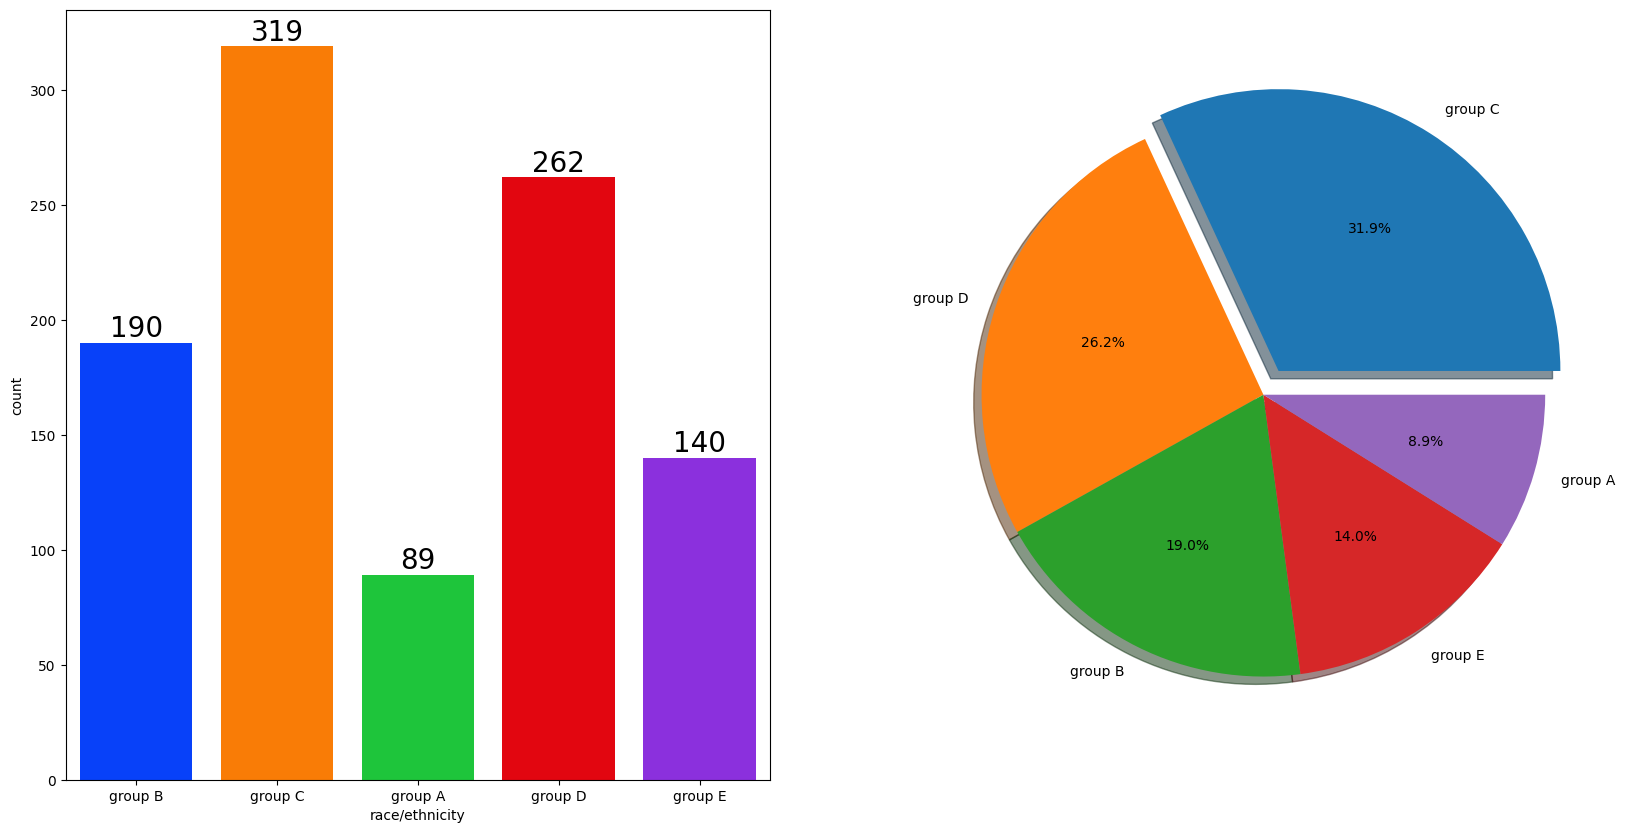

In [24]:
### race
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

C:\Users\mohak\AppData\Local\Temp\ipykernel_27776\2541133065.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['parental level of education'], palette = 'Blues')


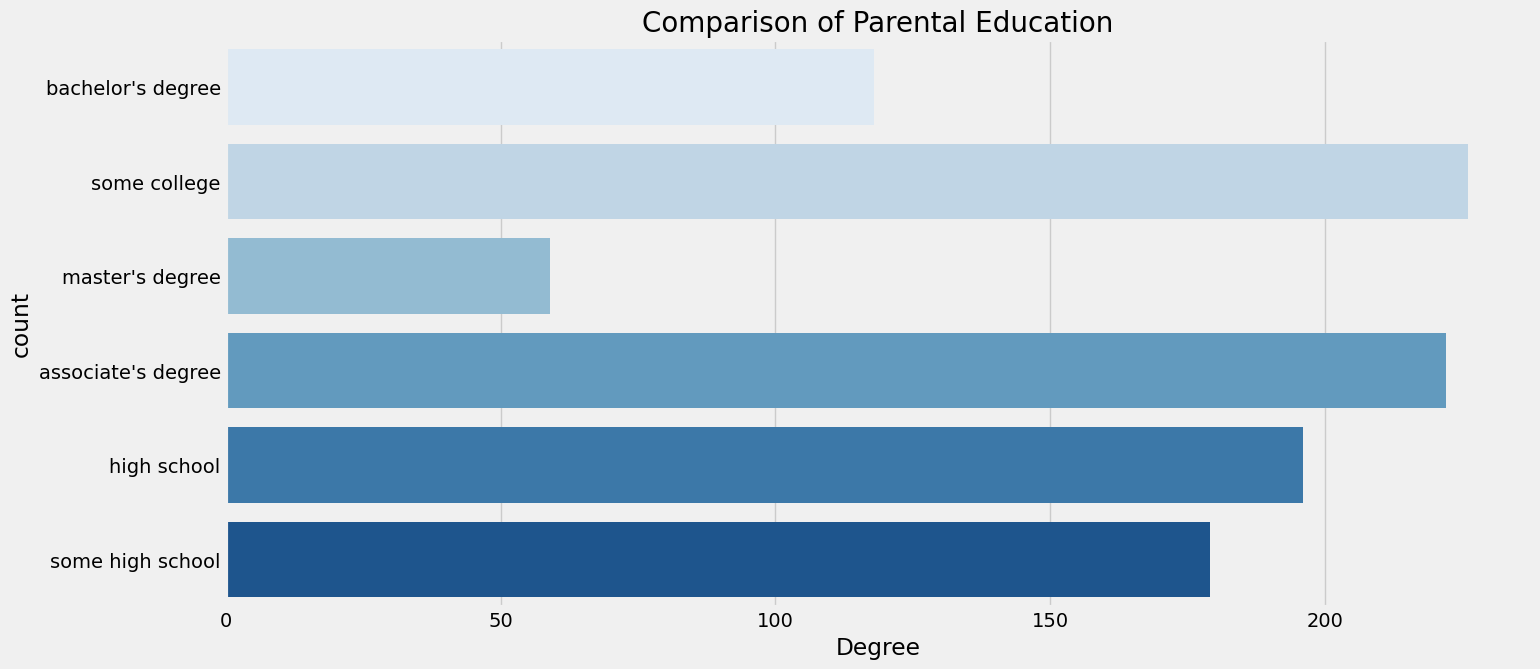

In [25]:
## parent education
plt.rcParams['figure.figsize'] = (15, 7)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

C:\Users\mohak\AppData\Local\Temp\ipykernel_27776\648695621.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['lunch'], palette = 'PuBu')


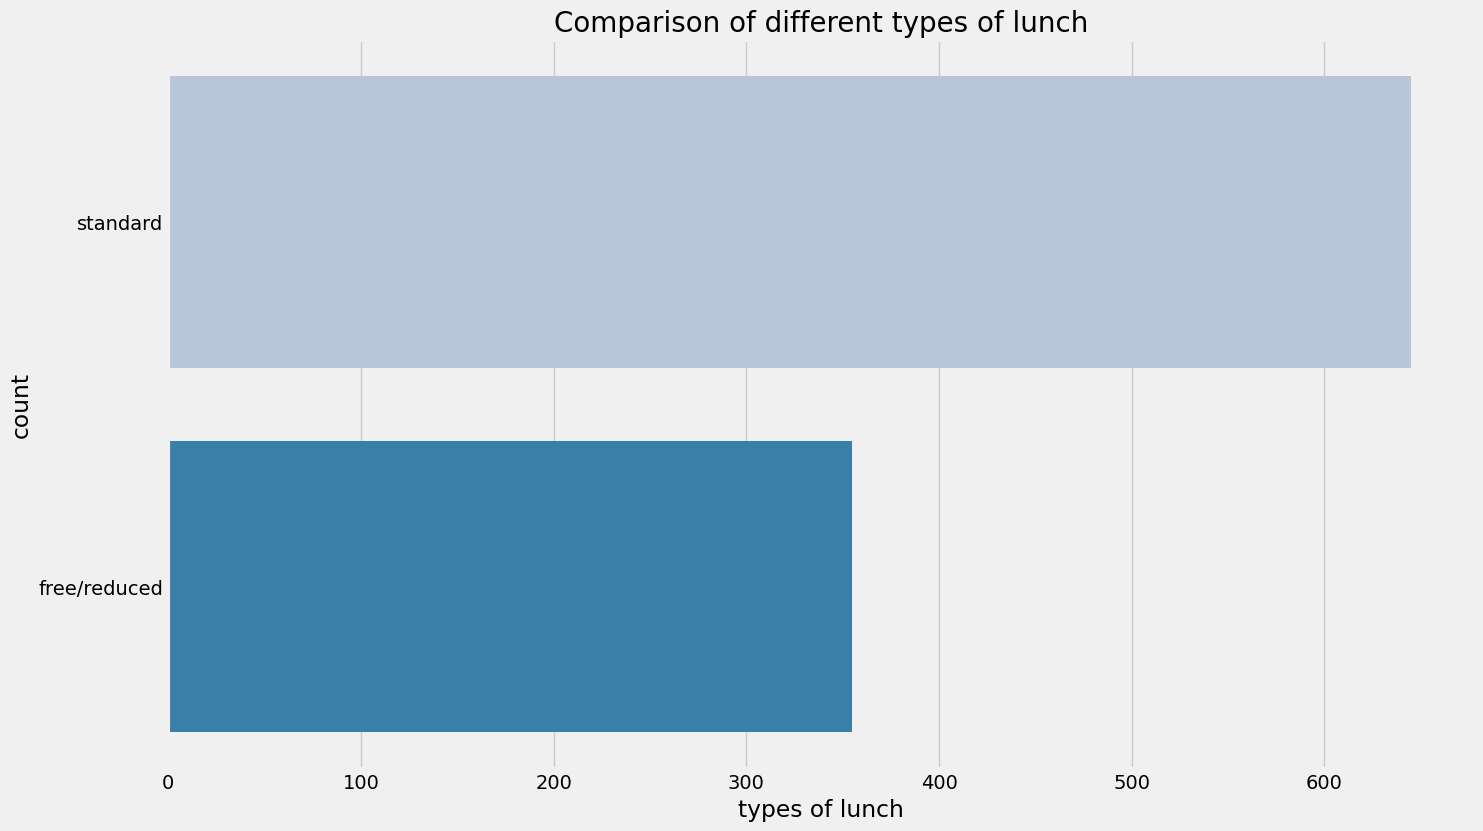

In [26]:
### Lunch
plt.rcParams['figure.figsize'] = (15, 9)
##plt.style.use('seaborn-talk')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

Bivariate analyses

In [27]:
gender_group = df.groupby('gender')[['math score', 'reading score', 'writing score', 'total score', 'average']].mean()
gender_group

,math score,reading score,writing score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


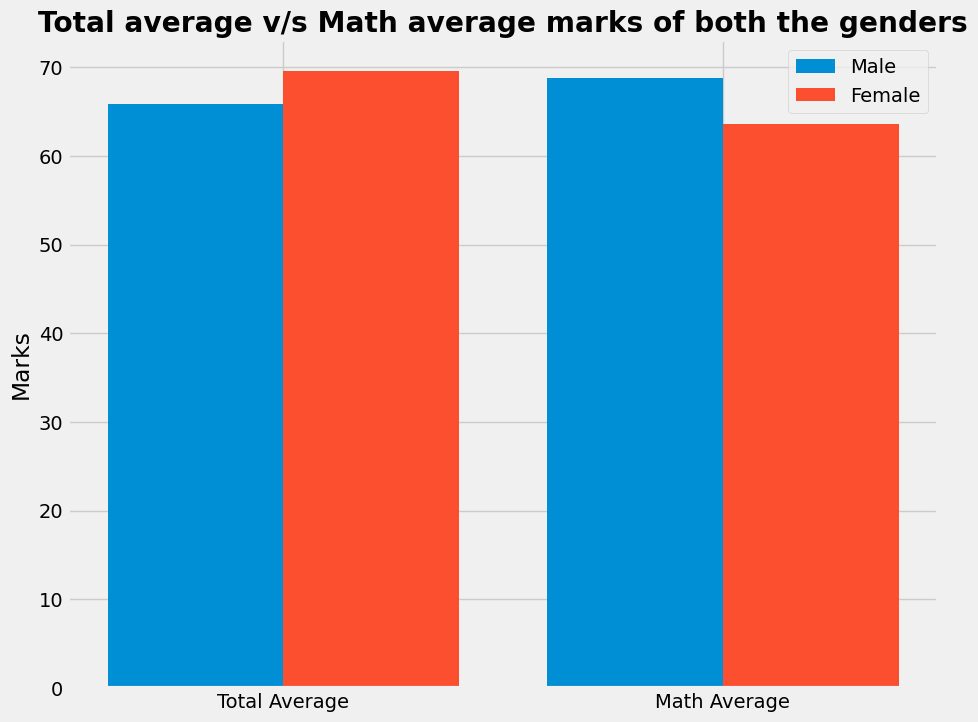

In [28]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math score'][0]]
male_scores = [gender_group['average'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

C:\Users\mohak\AppData\Local\Temp\ipykernel_27776\3979719510.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
C:\Users\mohak\AppData\Local\Temp\ipykernel_27776\3979719510.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
C:\Users\mohak\AppData\Local\Temp\ipykernel_27776\3979719510.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same eff

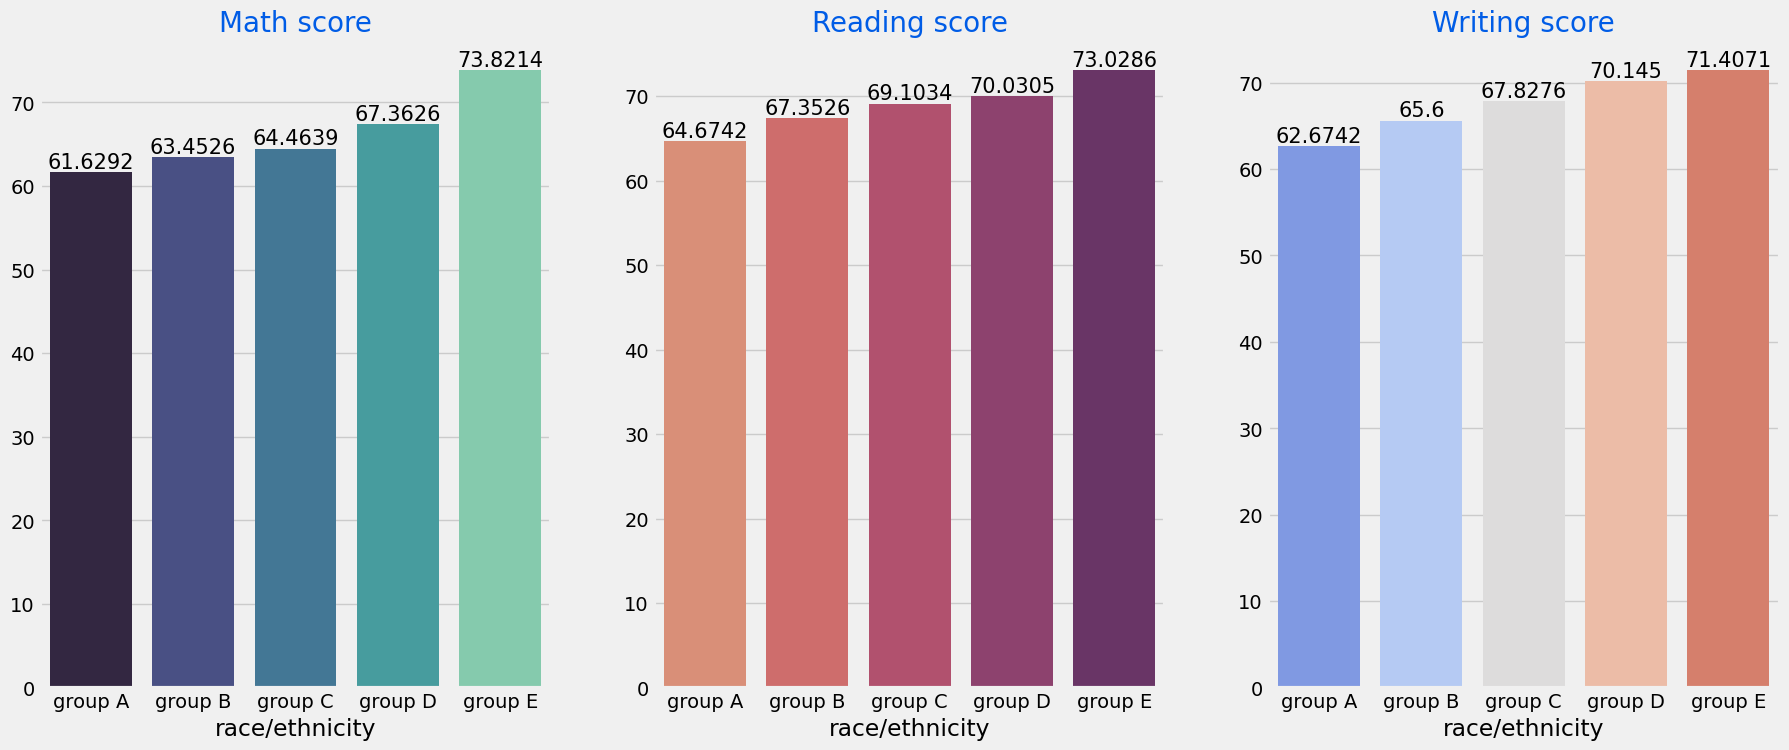

In [29]:
Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

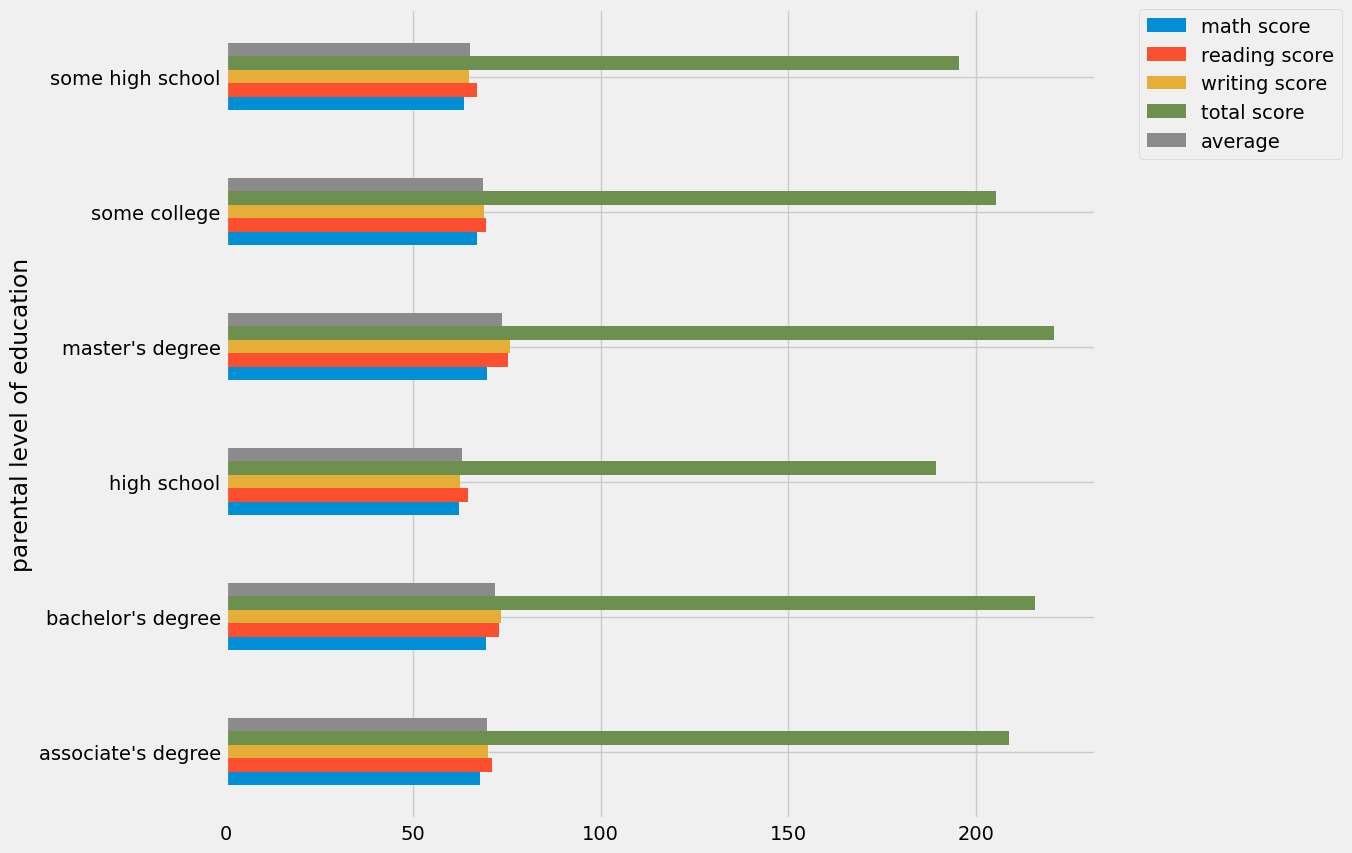

In [30]:
# Select only numeric columns for aggregation
numeric_df = df.select_dtypes(include=np.number)

# Group by 'parental level of education' and calculate the mean of numeric columns
numeric_df.groupby(df['parental level of education']).agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

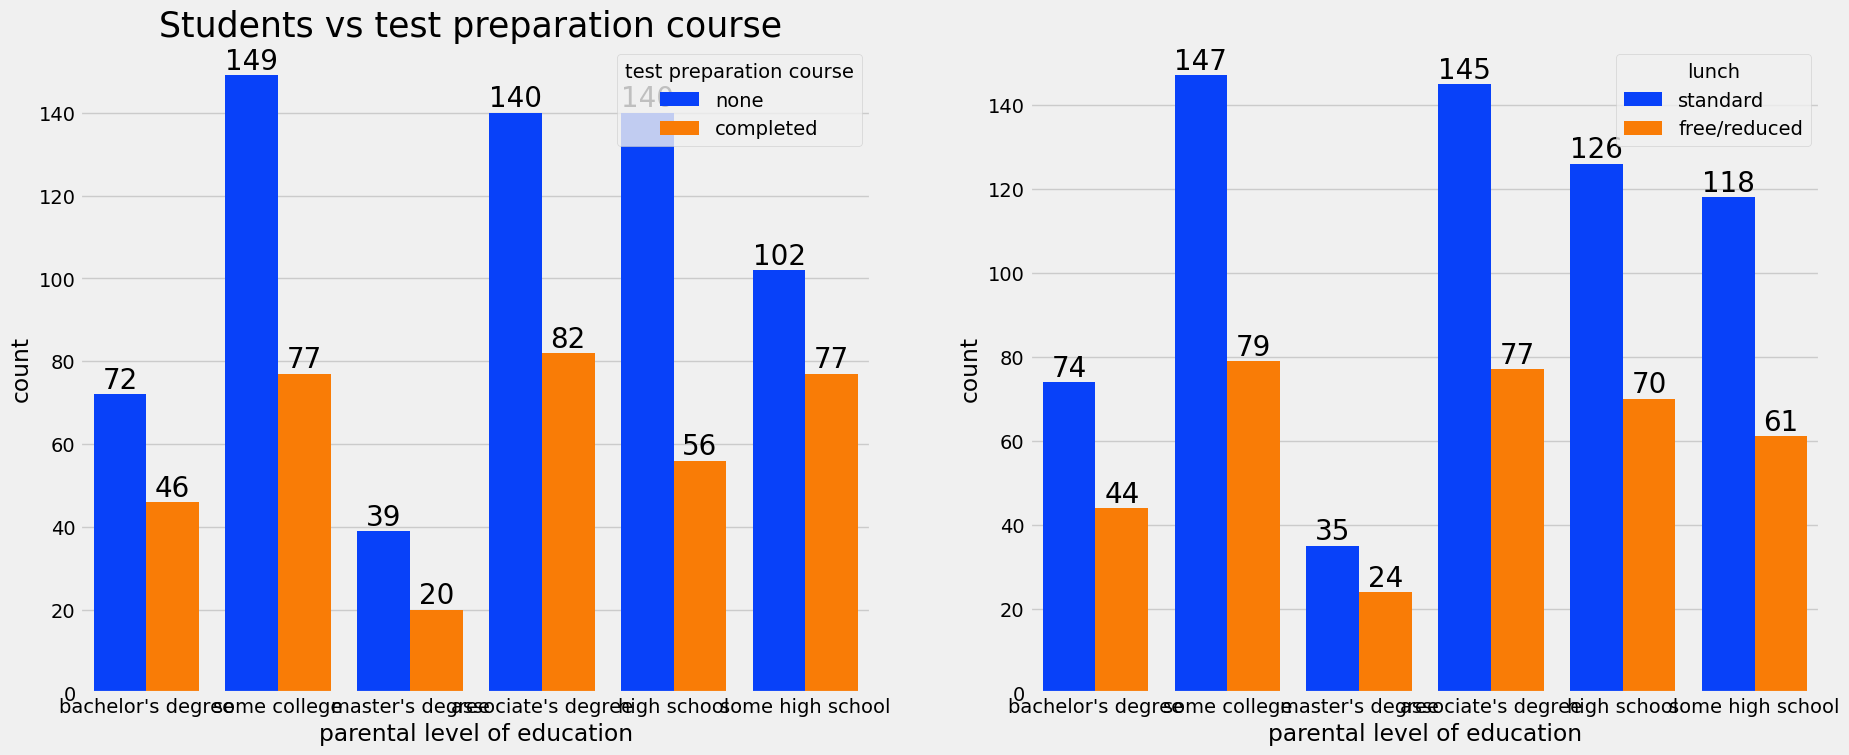

In [31]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)

<Axes: xlabel='lunch', ylabel='writing score'>

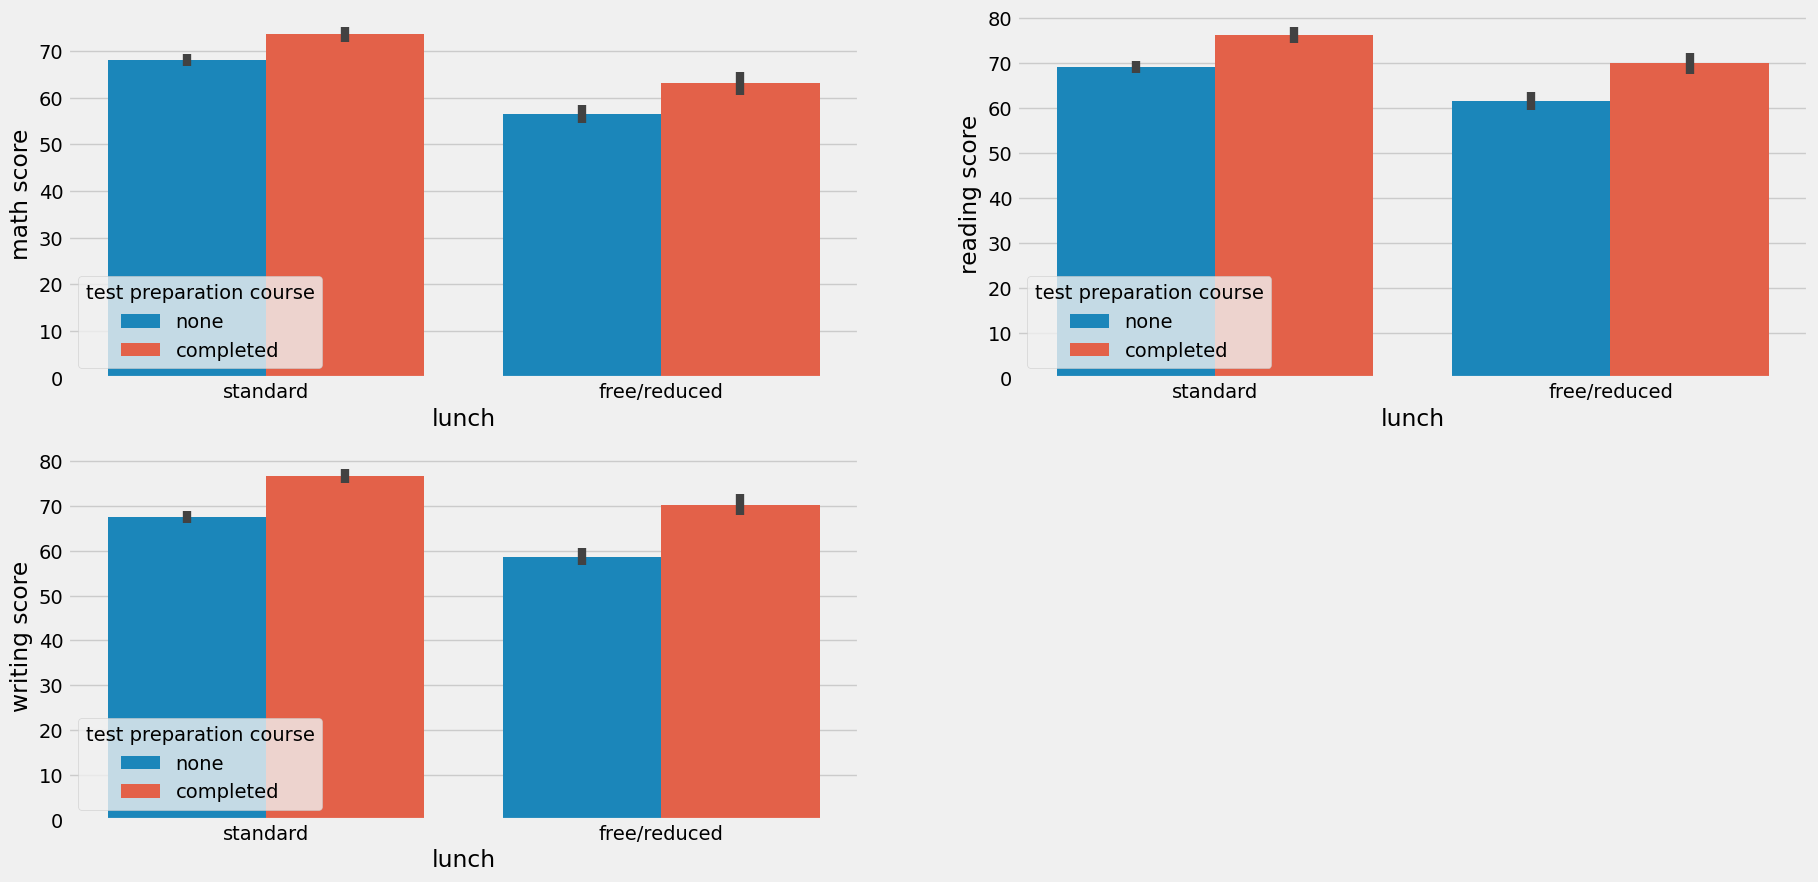

In [32]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])

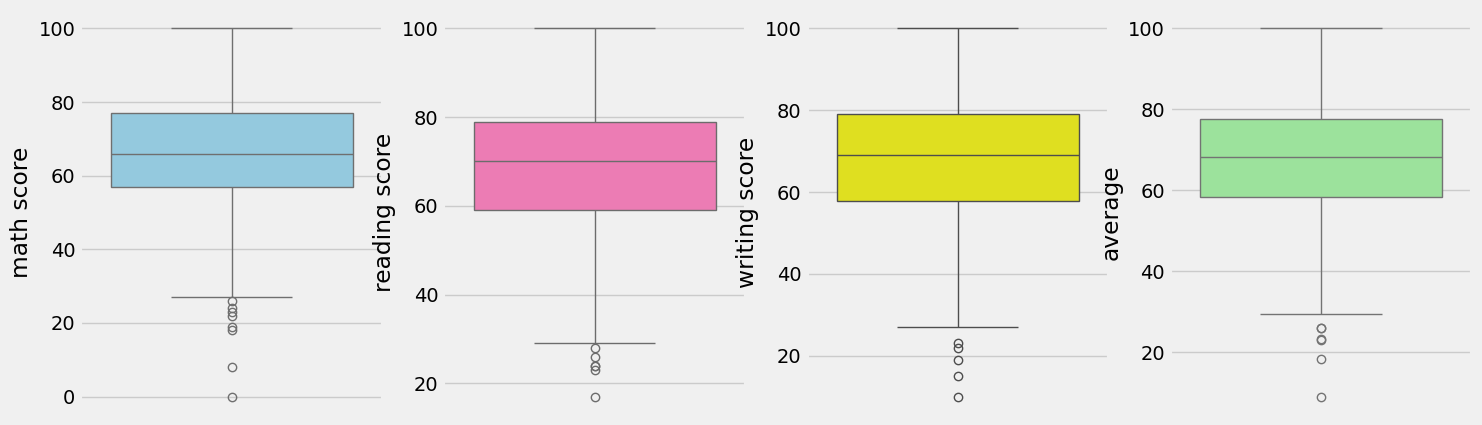

In [33]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

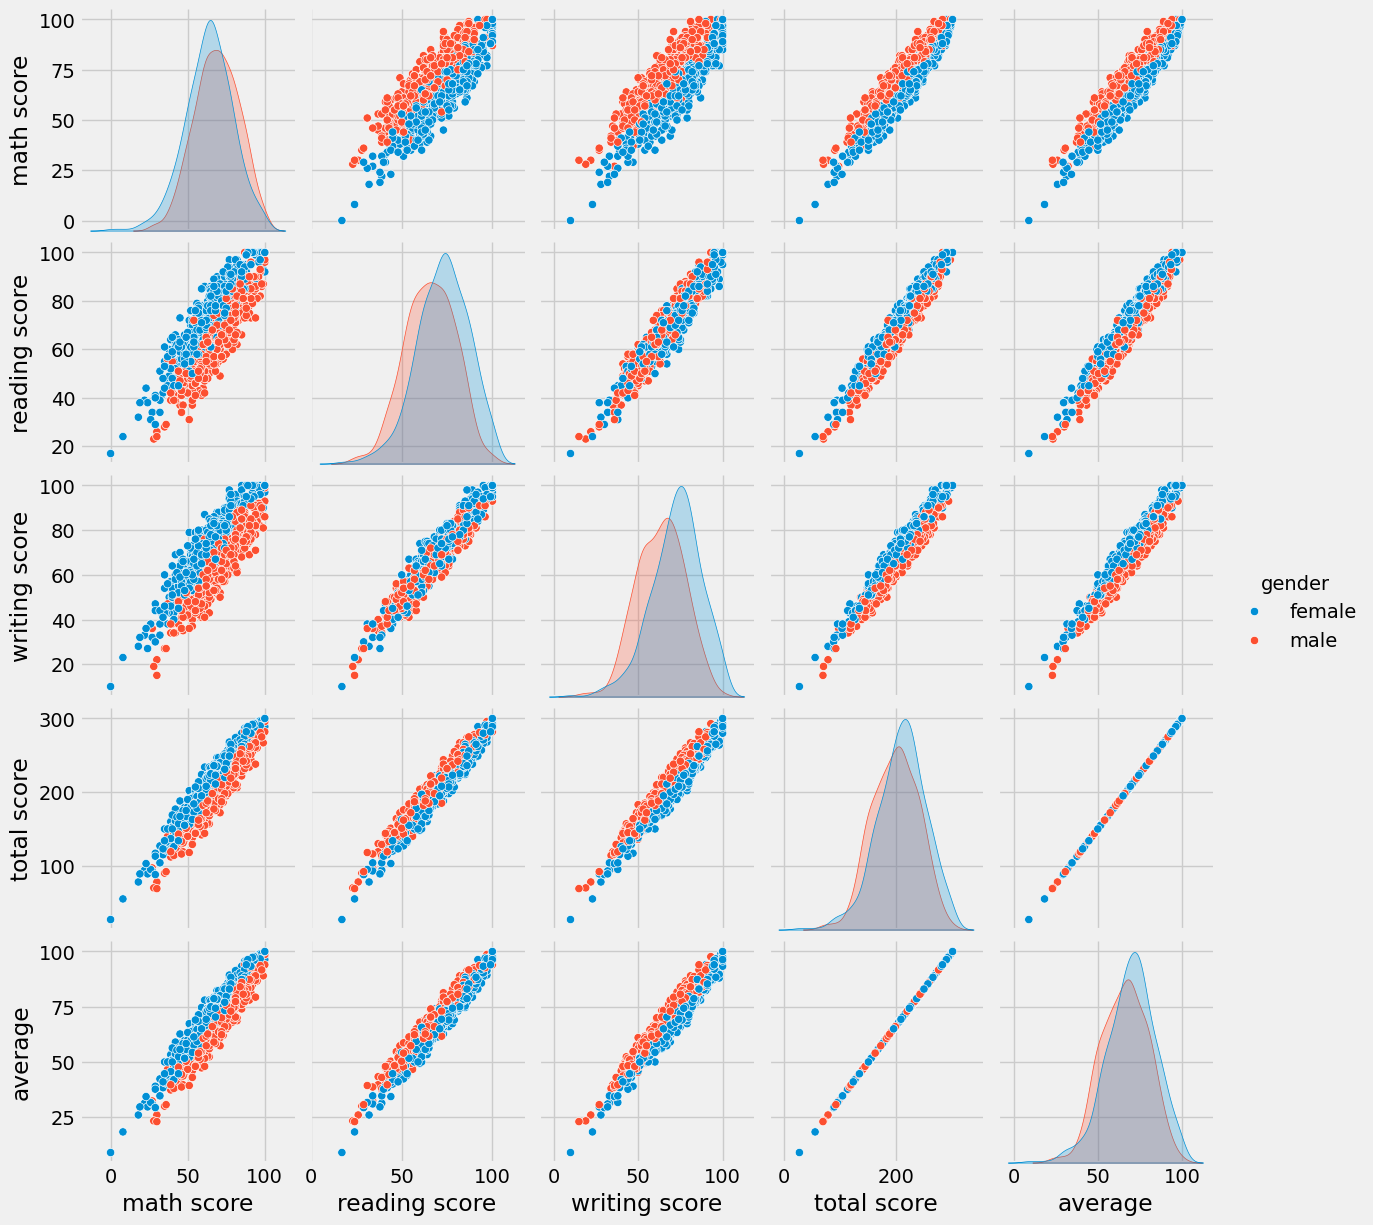

In [34]:
sns.pairplot(df,hue = 'gender')
plt.show()

In [35]:
0

0